## 날씨 예측 모델

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../CSV/서울 기상 데이터/2013_2018_seoul_weather.csv", parse_dates=["일시"])

In [3]:
data.head(3)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2013-01-01 00:00:00,-8.3,0.0,NaN,NaN,3.6,0.0,50.0,...,10.0,2000.0,NaN,NaN,-3.3,0.0,-2.9,-1.6,-0.5,0.3
1,108,서울,2013-01-01 01:00:00,-8.5,0.0,NaN,NaN,4.0,0.0,50.0,...,NaN,NaN,NaN,NaN,-3.4,0.0,-2.9,-1.6,-0.5,0.3
2,108,서울,2013-01-01 02:00:00,-8.4,0.0,NaN,NaN,4.0,0.0,70.0,...,NaN,NaN,NaN,NaN,-3.4,0.0,-3.0,-1.6,-0.5,0.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             52584 non-null  int64         
 1   지점명            52584 non-null  object        
 2   일시             52584 non-null  datetime64[ns]
 3   기온(°C)         52584 non-null  float64       
 4   기온 QC플래그       51095 non-null  float64       
 5   강수량(mm)        4944 non-null   float64       
 6   강수량 QC플래그      13808 non-null  float64       
 7   풍속(m/s)        52538 non-null  float64       
 8   풍속 QC플래그       50893 non-null  float64       
 9   풍향(16방위)       52478 non-null  float64       
 10  풍향 QC플래그       50893 non-null  float64       
 11  습도(%)          52537 non-null  float64       
 12  습도 QC플래그       51095 non-null  float64       
 13  증기압(hPa)       52572 non-null  float64       
 14  이슬점온도(°C)      52554 non-null  float64       
 15  현지기압(hPa)      5252

In [5]:
new_data = data[["일시", "기온(°C)"]]

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      52584 non-null  datetime64[ns]
 1   기온(°C)  52584 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 821.8 KB


In [7]:
new_data["year"] = new_data["일시"].dt.year
new_data["month"] = new_data["일시"].dt.month
new_data["day"] = new_data["일시"].dt.day
new_data["hour"] = new_data["일시"].dt.hour + 1

/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_7304/3947542609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["year"] = new_data["일시"].dt.year
/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_7304/3947542609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["month"] = new_data["일시"].dt.month
/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_7304/3947542609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [8]:
new_data.head(50)

,일시,기온(°C),year,month,day,hour
0,2013-01-01 00:00:00,-8.3,2013,1,1,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,2
2,2013-01-01 02:00:00,-8.4,2013,1,1,3
3,2013-01-01 03:00:00,-8.1,2013,1,1,4
4,2013-01-01 04:00:00,-8.2,2013,1,1,5
5,2013-01-01 05:00:00,-8.2,2013,1,1,6
6,2013-01-01 06:00:00,-8.6,2013,1,1,7
7,2013-01-01 07:00:00,-8.3,2013,1,1,8
8,2013-01-01 08:00:00,-7.9,2013,1,1,9
9,2013-01-01 09:00:00,-7.0,2013,1,1,10


In [9]:
new_data.corr()

,기온(°C),year,month,day,hour
기온(°C),1.000000,5.049077e-03,2.298064e-01,8.911949e-03,1.266281e-01
year,0.005049,1.000000e+00,-1.753370e-04,2.016196e-04,-1.871617e-15
month,0.229806,-1.753370e-04,1.000000e+00,1.097865e-02,7.324431e-17
day,0.008912,2.016196e-04,1.097865e-02,1.000000e+00,-1.371064e-17
hour,0.126628,-1.871617e-15,7.324431e-17,-1.371064e-17,1.000000e+00


In [10]:
new_data.shape

(52584, 6)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [12]:
# 2013 ~ 2018
X = new_data[["year", "month", "day", "hour"]]
y = new_data["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.992

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.990

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.989

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.986

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.983

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.978

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.996
테스트용 데이터 정확도 : 0.970

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.994
테스트용 데이터 정확도 : 0.958

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.991
테스트용 데이터 정확도 : 0.936



In [13]:
# 2013 ~ 2018
X = new_data[["year", "month", "hour"]]
y = new_data["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.886

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.885

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.893
테스트용 데이터 정확도 : 0.883

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.882

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.882

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.896
테스트용 데이터 정확도 : 0.879

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.899
테스트용 데이터 정확도 : 0.875

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.905
테스트용 데이터 정확도 : 0.867

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.923
테스트용 데이터 정확도 : 0.853



In [14]:
# 2013 ~ 2018
X = new_data[["year", "month", "day", "hour"]]
y = new_data["기온(°C)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.1,
                                                   random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.predict(X_test)
print("학습용 : {}, 테스트용 : {}".format(10 - 1, 1))
print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
print()

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.992



In [15]:
test = pd.read_csv("../CSV/가스공급량 수요예측 모델개발 data/test.csv")

In [16]:
test.head(3)

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A


In [17]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday

In [18]:
test.tail(3)

,일자|시간|구분,일자,시간,구분,year,month,day,weekday
15117,2019-03-31 22 H,2019-03-31,22,H,2019,3,31,6
15118,2019-03-31 23 H,2019-03-31,23,H,2019,3,31,6
15119,2019-03-31 24 H,2019-03-31,24,H,2019,3,31,6


In [19]:
test.columns = ['일자|시간|구분', '일자', 'hour', '구분', 'year', 'month', 'day', 'weekday']
test = test[['일자|시간|구분', '구분', '일자', 'year', 'month', 'day', 'hour', 'weekday']]
test.head(3)

,일자|시간|구분,구분,일자,year,month,day,hour,weekday
0,2019-01-01 01 A,A,2019-01-01,2019,1,1,1,1
1,2019-01-01 02 A,A,2019-01-01,2019,1,1,2,1
2,2019-01-01 03 A,A,2019-01-01,2019,1,1,3,1


In [20]:
test_x = test[["year", "month", "day", "hour"]]

### 19년도 기온 예측

In [21]:
pred = model.predict(test_x)
test["기온"] = pred

In [22]:
test.head(50)

,일자|시간|구분,구분,일자,year,month,day,hour,weekday,기온
0,2019-01-01 01 A,A,2019-01-01,2019,1,1,1,1,-3.376
1,2019-01-01 02 A,A,2019-01-01,2019,1,1,2,1,-3.365
2,2019-01-01 03 A,A,2019-01-01,2019,1,1,3,1,-3.730
3,2019-01-01 04 A,A,2019-01-01,2019,1,1,4,1,-3.915
4,2019-01-01 05 A,A,2019-01-01,2019,1,1,5,1,-4.058
5,2019-01-01 06 A,A,2019-01-01,2019,1,1,6,1,-4.360
6,2019-01-01 07 A,A,2019-01-01,2019,1,1,7,1,-4.478
7,2019-01-01 08 A,A,2019-01-01,2019,1,1,8,1,-4.613
8,2019-01-01 09 A,A,2019-01-01,2019,1,1,9,1,-4.567
9,2019-01-01 10 A,A,2019-01-01,2019,1,1,10,1,-4.285


In [23]:
new_data.head(50)

,일시,기온(°C),year,month,day,hour
0,2013-01-01 00:00:00,-8.3,2013,1,1,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,2
2,2013-01-01 02:00:00,-8.4,2013,1,1,3
3,2013-01-01 03:00:00,-8.1,2013,1,1,4
4,2013-01-01 04:00:00,-8.2,2013,1,1,5
5,2013-01-01 05:00:00,-8.2,2013,1,1,6
6,2013-01-01 06:00:00,-8.6,2013,1,1,7
7,2013-01-01 07:00:00,-8.3,2013,1,1,8
8,2013-01-01 08:00:00,-7.9,2013,1,1,9
9,2013-01-01 09:00:00,-7.0,2013,1,1,10


### 예측한 데이터 저장
* test 데이터 프레임 저장

In [48]:
test.to_csv("../CSV/pred_test.csv", index = False)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='일자', ylabel='기온'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

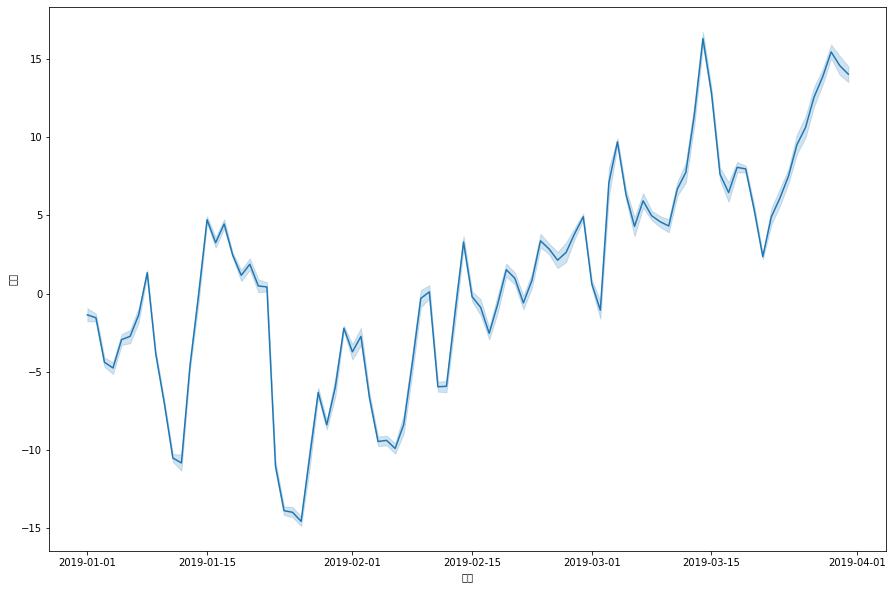

In [31]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일자", y = "기온", data = test)

In [36]:
a = new_data[(new_data["year"] == 2013) & ((new_data["month"] == 1) | (new_data["month"] == 2) | (new_data["month"] == 3))]

<AxesSubplot:xlabel='일시', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

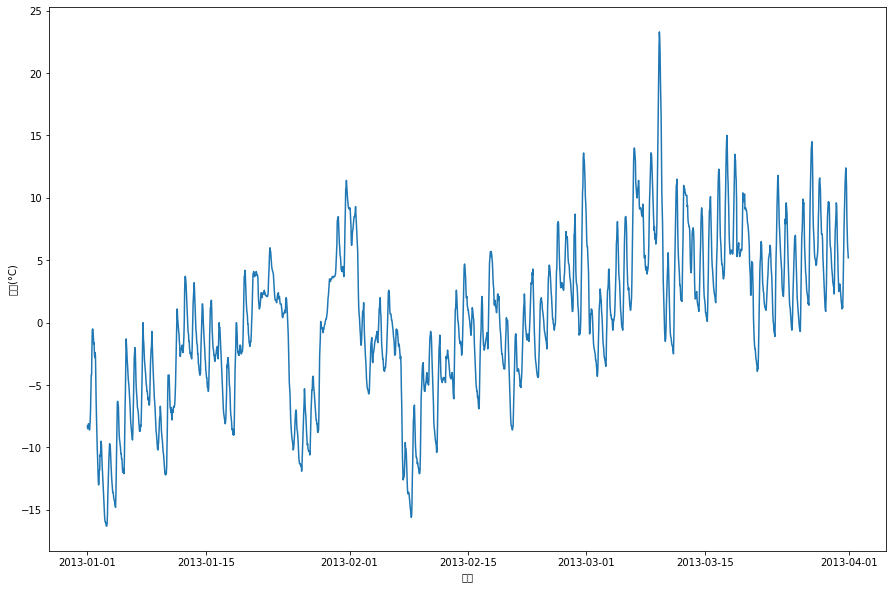

In [37]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일시", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


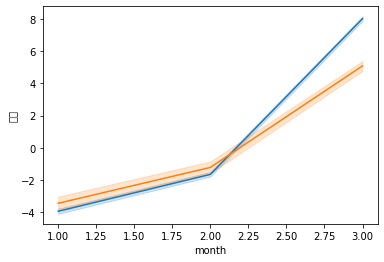

In [44]:
sns.lineplot(x = "month", y = "기온", data = test)
sns.lineplot(x = "month", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


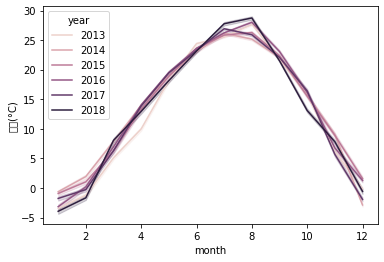

In [46]:
sns.lineplot(x = "month", y = "기온(°C)", hue = "year", data = new_data)